In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df=pd.read_csv("heart_disease_data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# checking the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# statistical info about the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# renaming the columns
df = df.rename(columns = {'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol': 'cholesterol','fbs': 'fasting_blood_sugar', 
                       'restecg' : 'resting_electrocardiogram', 'thalach': 'max_heart_rate_achieved', 'exang': 'exercise_induced_angina',
                       'oldpeak': 'st_depression', 'slope': 'st_slope', 'ca':'num_major_vessels', 'thal': 'thalassemia'}, errors="raise")

Text(0.5, 1.0, 'Count of each Target Class')

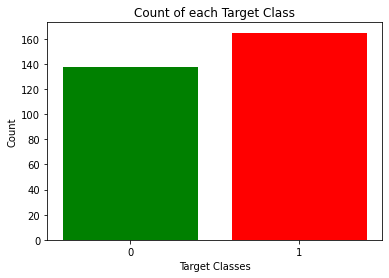

In [7]:
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

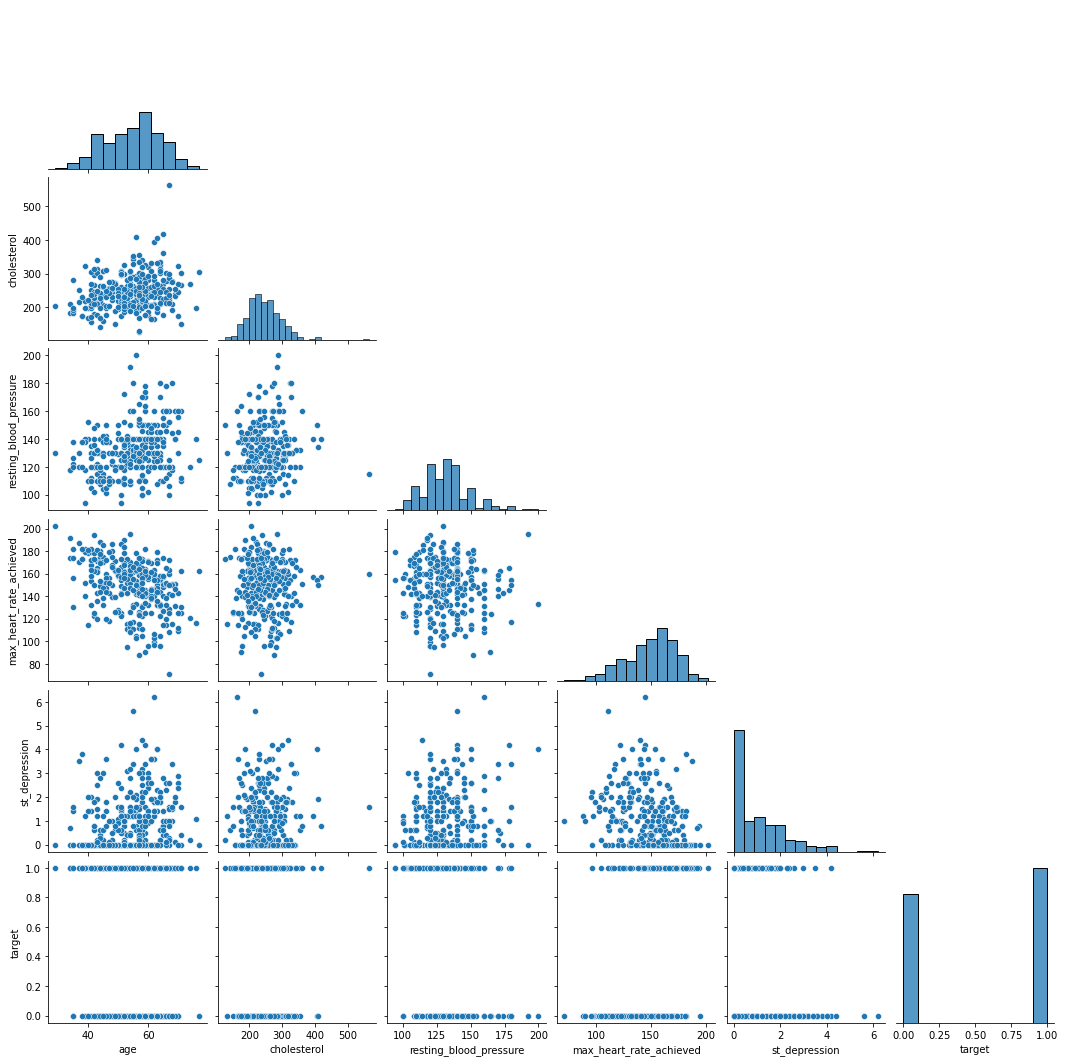

In [8]:
data_g = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_s = df[data_g]
g = sns.pairplot(data_s, corner=True, diag_kind='hist');

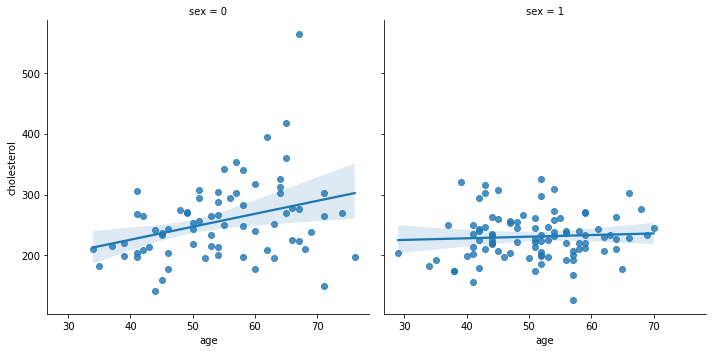

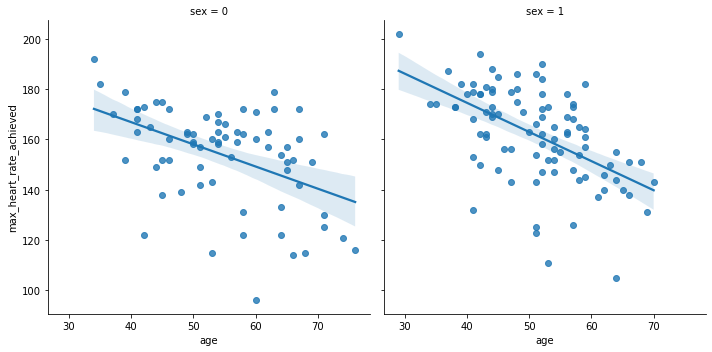

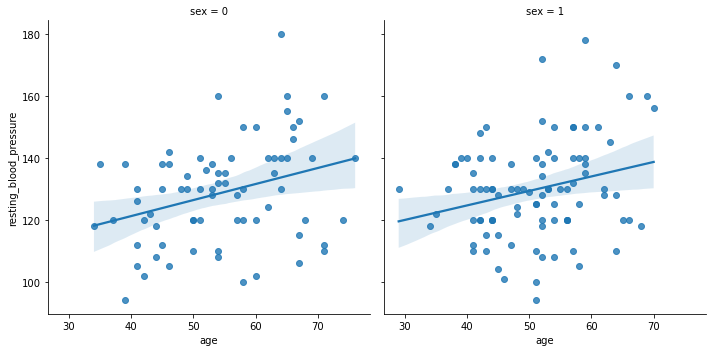

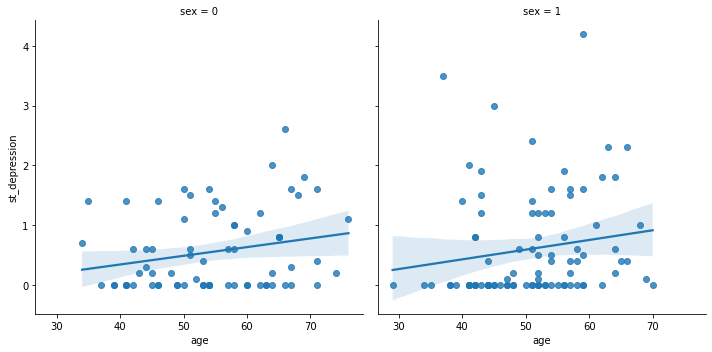

In [9]:
sns.lmplot(data=df[df['target'] ==1], x='age', y='cholesterol',col='sex')
sns.lmplot(data=df[df['target'] ==1], x='age', y='max_heart_rate_achieved',col='sex')
sns.lmplot(data=df[df['target'] ==1], x='age', y='resting_blood_pressure',col='sex')
sns.lmplot(data=df[df['target'] ==1], x='age', y='st_depression',col='sex')

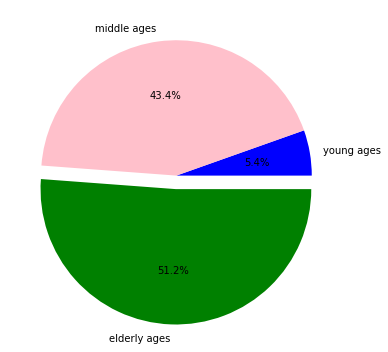

In [10]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]
colors = ['blue','pink','green']
explode = [0,0,0.1]
plt.figure(figsize=(6,5))
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

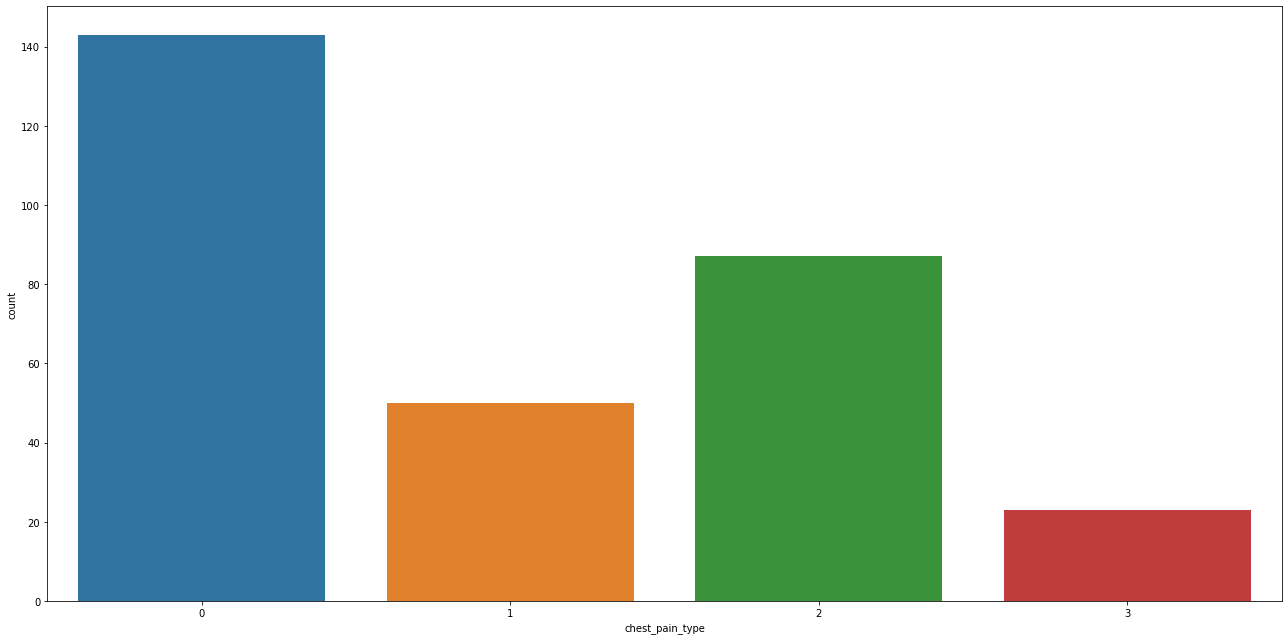

In [11]:
plt.figure(figsize=(18,9))
sns.countplot(df['chest_pain_type'])
plt.tight_layout()

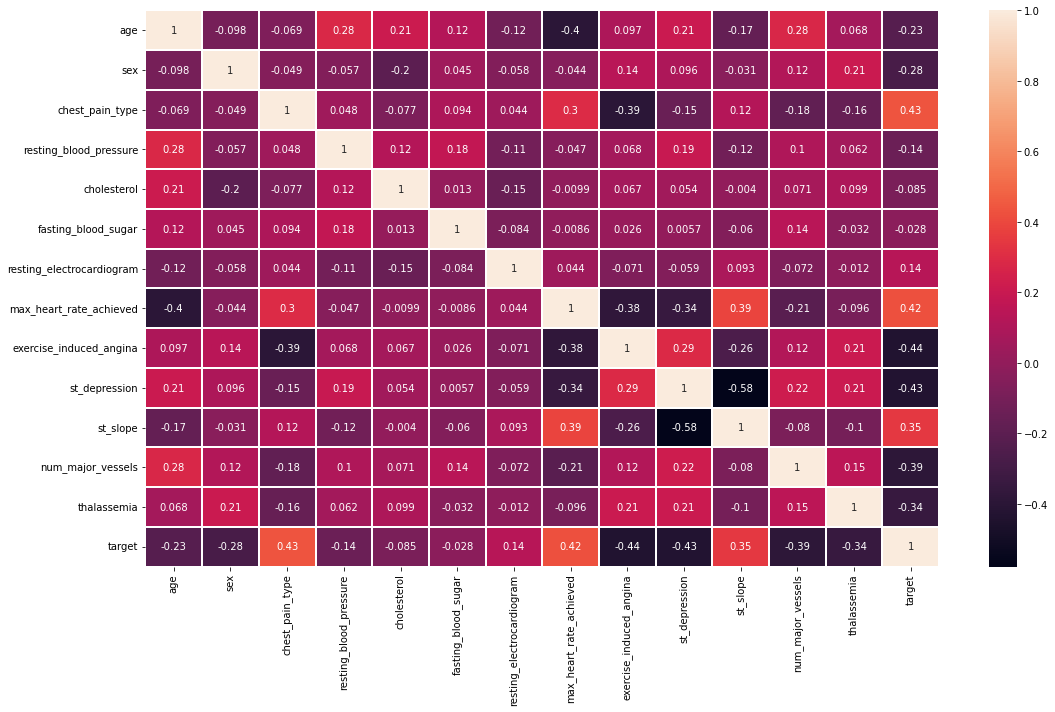

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df.target
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,Y_train)
pred = lm.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred)) 

[[21  6]
 [ 3 31]]


In [18]:
tp,fp,fn,tn=confusion_matrix(Y_test,pred).ravel()
(tp,fp,fn,tn)

(21, 6, 3, 31)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [20]:
score_lm = round(accuracy_score(pred,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lm)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred))

[[21  6]
 [ 4 30]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [24]:
score_knn = round(accuracy_score(pred,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 83.61 %


In [25]:
# finding the best k-value
error_rate = [] 

for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train,Y_train) 
    pred_k = knn.predict(X_test) 
    error_rate.append(np.mean(pred_k != Y_test)) 

Text(0, 0.5, 'Error Rate')

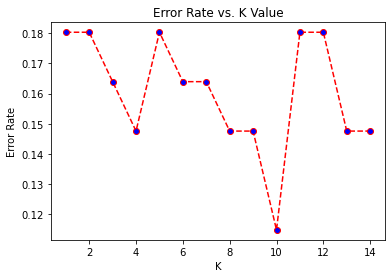

In [26]:
plt.plot(range(1,15),error_rate,color='red', linestyle='dashed', marker='o',mfc='blue')
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate')

In [27]:
knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train,Y_train) 
pred = knn.predict(X_test) 
print('WITH K=13') 
print('\n') 
print(confusion_matrix(Y_test,pred)) 
print('\n') 
print(classification_report(Y_test,pred))

WITH K=13


[[20  7]
 [ 2 32]]


              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [28]:
score_knn = round(accuracy_score(pred,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 85.25 %


In [29]:
from sklearn import svm
sv = svm.SVC(kernel='linear',probability=True)
sv.fit(X_train, Y_train)
pred= sv.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred)) 

[[20  7]
 [ 4 30]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [32]:
score_svm = round(accuracy_score(pred,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[21  6]
 [ 8 26]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [36]:
score_dt = round(accuracy_score(y_pred,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.05 %


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[23  4]
 [ 6 28]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [40]:
score_rf = round(accuracy_score(y_pred,Y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 83.61 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

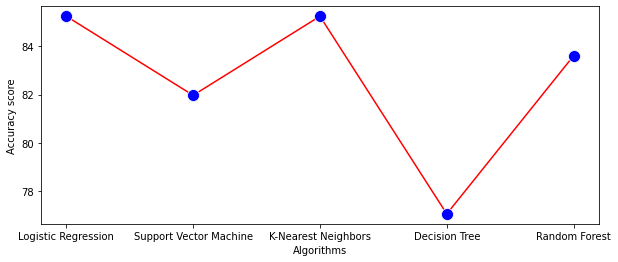

In [41]:
scores = [score_lm,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]

plt.figure(figsize=(10,4))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.lineplot(algorithms,scores,color='red', linestyle='-', ms=12, marker='o',mfc='blue')

In [42]:
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn import metrics

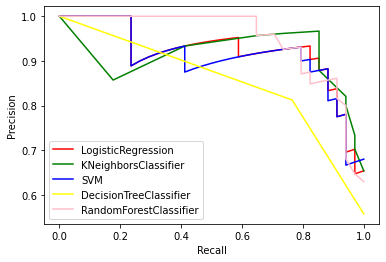

In [43]:
classifiers=((lm,'red'),(knn,'green'),(sv,'blue'),(dt,'yellow'),(rf,'pink'))
for classifier,color in classifiers:
    y_score =classifier.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(Y_test, y_score)
    plt.plot(recall, precision, color=color)
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.legend(labels=['LogisticRegression','KNeighborsClassifier','SVM','DecisionTreeClassifier','RandomForestClassifier'],loc=3)

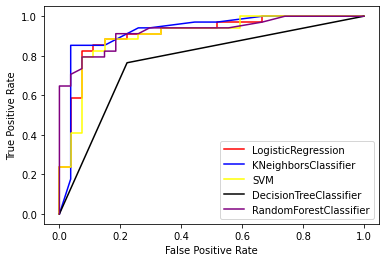

In [44]:
classifiers=((lm,'red'),(knn,'blue'),(sv,'yellow'),(dt,'black'),(rf,'purple'))
for classifier,color in classifiers:
    y_pred_proba = classifier.predict_proba(X_test)[:,1]
    fpr, tpr, thresh= metrics.roc_curve(Y_test,  y_pred_proba)
    plt.plot(fpr,tpr,color=color)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(labels=['LogisticRegression','KNeighborsClassifier','SVM','DecisionTreeClassifier','RandomForestClassifier'],loc=4)